# RMNpy DependentVariable Tutorial

This tutorial demonstrates how to work with the `DependentVariable` class in RMNpy, which represents multi-dimensional scientific data with units and physical quantities. The examples are based on the comprehensive test suite for `DependentVariable`.

## Table of Contents
1. [Import Required Libraries](#import-required-libraries)
2. [Basic DependentVariable Creation](#basic-dependentvariable-creation)
3. [Property Manipulation](#property-manipulation)
4. [Working with Different Data Types](#working-with-different-data-types)
5. [Data Operations and Manipulation](#data-operations-and-manipulation)
6. [Units and Physical Quantities](#units-and-physical-quantities)
7. [Error Handling and Validation](#error-handling-and-validation)
8. [Advanced Features](#advanced-features)

## Import Required Libraries

First, let's import all the necessary modules for working with DependentVariable:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Import DependentVariable and related classes
from rmnpy import DependentVariable
from rmnpy.sitypes import quantity as q
from rmnpy.sitypes import Unit

# Set up matplotlib for inline plotting
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

print("Successfully imported RMNpy DependentVariable and related modules")
print(f"Available quantity types: {dir(q)[:5]}...")  # Show first 5 quantities

Successfully imported RMNpy DependentVariable and related modules
Available quantity types: ['AbsorbedDose', 'AbsorbedDoseRate', 'Acceleration', 'Action', 'Amount']...


## Basic DependentVariable Creation

Let's start by creating basic DependentVariable instances following the patterns from the test suite:

In [2]:
# Create a simple scalar DependentVariable with float64 data
data = np.array([1.0, 2.0, 3.0, 4.0], dtype=np.float64)

# Create DependentVariable with minimal parameters (following test patterns)
dv_basic = DependentVariable(
    components=[data],
    name="basic_example",
    description="A simple DependentVariable example",
    unit=" ",  # dimensionless unit
    quantity_name=q.Dimensionless,
    quantity_type="scalar",
    element_type="float64"
)

print(f"Created DependentVariable with name: '{dv_basic.name}'")
print(f"Description: '{dv_basic.description}'")
print(f"Size: {dv_basic.size}")
print(f"Quantity type: {dv_basic.quantity_type}")
print(f"Quantity name: {dv_basic.quantity_name}")
print(f"Components: {dv_basic.components}")

DEBUG: Created OCData with TypeID: 7, Type name: OCData
Created DependentVariable with name: 'basic_example'
Description: 'A simple DependentVariable example'
Size: 4
Quantity type: scalar
Quantity name: dimensionless
Components: [array([1., 2., 3., 4.])]


## Property Manipulation

DependentVariable objects have several properties that can be get and set. Let's explore these:

In [3]:
# Create a DependentVariable for property testing
test_data = np.array([10.0, 20.0, 30.0], dtype=np.float64)
dv_props = DependentVariable(
    components=[test_data],
    name="",  # Start with empty name
    description="",  # Start with empty description
    unit=" ",
    quantity_name=q.Dimensionless,
    quantity_type="scalar",
    element_type="float64"
)

print("=== Initial State ===")
print(f"Name: '{dv_props.name}'")
print(f"Description: '{dv_props.description}'")
print(f"Size: {dv_props.size}")

# Test property setters (following C test patterns)
dv_props.name = "foo"
dv_props.description = "bar"

print("\n=== After Setting Properties ===")
print(f"Name: '{dv_props.name}'")
print(f"Description: '{dv_props.description}'")

# Test quantity name changes
print(f"\nOriginal quantity: {dv_props.quantity_name}")
dv_props.quantity_name = q.LengthRatio
print(f"Updated quantity: {dv_props.quantity_name}")

DEBUG: Created OCData with TypeID: 7, Type name: OCData
=== Initial State ===
Name: ''
Description: ''
Size: 3

=== After Setting Properties ===
Name: 'foo'
Description: 'bar'

Original quantity: dimensionless
Updated quantity: length ratio


### Size Property Manipulation

The size property can be dynamically changed:

In [4]:
# Create DependentVariable for size testing
size_data = np.array([1.0, 2.0, 3.0], dtype=np.float64)
dv_size = DependentVariable(
    components=[size_data],
    name="size_test",
    description="Testing size manipulation",
    unit=" ",
    quantity_name=q.Dimensionless,
    quantity_type="scalar",
    element_type="float64"
)

print(f"Initial size: {dv_size.size}")

# Increase size
dv_size.size = 5
print(f"After increasing to 5: {dv_size.size}")

# Decrease size
dv_size.size = 2
print(f"After decreasing to 2: {dv_size.size}")

# Set to zero (should be valid)
dv_size.size = 0
print(f"After setting to 0: {dv_size.size}")

# Test invalid size (this will raise an error)
try:
    dv_size.size = -1
    print("ERROR: Negative size should not be allowed!")
except ValueError as e:
    print(f"✓ Correctly caught error for negative size: {e}")

DEBUG: Created OCData with TypeID: 7, Type name: OCData
Initial size: 3
After increasing to 5: 5
After decreasing to 2: 2
After setting to 0: 0
✓ Correctly caught error for negative size: Size must be non-negative


## Working with Different Data Types

DependentVariable can handle various data types including complex numbers:

In [5]:
# Create DependentVariable with complex data
complex_data = np.array([1.0+0.5j, 2.0+1.0j, 3.0+1.5j, 4.0+2.0j], dtype=np.complex128)

dv_complex = DependentVariable(
    components=[complex_data],
    name="complex_data",
    description="Complex data with real and imaginary parts",
    unit=" ",
    quantity_name=q.Dimensionless,
    quantity_type="scalar",
    element_type="complex128"
)

print(f"Complex DependentVariable created:")
print(f"Name: {dv_complex.name}")
print(f"Component count: {dv_complex.component_count}")
print(f"Size: {dv_complex.size}")
print(f"Element type: {dv_complex.element_type}")
print(f"Complex data: {dv_complex.components[0]}")

# Show real and imaginary parts
complex_component = np.array(dv_complex.components[0])
print(f"\nReal parts: {complex_component.real}")
print(f"Imaginary parts: {complex_component.imag}")
print(f"Magnitudes: {np.abs(complex_component)}")
print(f"Phases (radians): {np.angle(complex_component)}")

DEBUG: Created OCData with TypeID: 7, Type name: OCData
Complex DependentVariable created:
Name: complex_data
Component count: 1
Size: 4
Element type: complex128
Complex data: [1.+0.5j 2.+1.j  3.+1.5j 4.+2.j ]

Real parts: [1. 2. 3. 4.]
Imaginary parts: [0.5 1.  1.5 2. ]
Magnitudes: [1.11803399 2.23606798 3.35410197 4.47213595]
Phases (radians): [0.46364761 0.46364761 0.46364761 0.46364761]


### Updating Components

We can update the components of a DependentVariable, but the data type must match the original element type:

In [6]:
# Create new component data - must match the element type of the DependentVariable
# Since dv_complex was created with complex128, we need complex data
new_complex_data1 = np.array([10.0+5.0j, 20.0+10.0j, 30.0+15.0j], dtype=np.complex128)

print("=== Before updating components ===")
print(f"Size: {dv_complex.size}")
print(f"Component count: {dv_complex.component_count}")
print(f"Element type: {dv_complex.element_type}")

# Set single component with complex data
dv_complex.components = [new_complex_data1]
print("\n=== After setting single component ===")
print(f"Size: {dv_complex.size}")
print(f"Component count: {dv_complex.component_count}")
print(f"Component data: {np.array(dv_complex.components[0])}")

# Create a separate DependentVariable to demonstrate multiple float components
float_data1 = np.array([100.0, 200.0, 300.0], dtype=np.float64)
float_data2 = np.array([1000.0, 2000.0, 3000.0], dtype=np.float64)

dv_multi_float = DependentVariable(
    components=[float_data1],
    name="multi_component_data",
    description="Multi-component float data",
    unit=" ",
    quantity_name=q.Dimensionless,
    quantity_type="scalar",
    element_type="float64"
)

# Now set multiple float components on the float DependentVariable
dv_multi_float.components = [float_data1, float_data2]
print("\n=== Multi-component float data ===")
print(f"Size: {dv_multi_float.size}")
print(f"Component count: {dv_multi_float.component_count}")
for i, comp in enumerate(dv_multi_float.components):
    print(f"Component {i}: {np.array(comp)}")

=== Before updating components ===
Size: 4
Component count: 1
Element type: complex128

=== After setting single component ===
Size: 3
Component count: 1
Component data: [10. +5.j 20.+10.j 30.+15.j]
DEBUG: Created OCData with TypeID: 7, Type name: OCData

=== Multi-component float data ===
Size: 3
Component count: 2
Component 0: [100. 200. 300.]
Component 1: [1000. 2000. 3000.]


## Data Operations and Manipulation

Let's explore data operations like appending DependentVariables:

In [7]:
# Create first DependentVariable
data1 = np.array([1.0, 2.0, 3.0], dtype=np.float64)
dv1 = DependentVariable(
    components=[data1],
    name="dataset1",
    description="First dataset",
    unit=" ",
    quantity_name=q.Dimensionless,
    quantity_type="scalar",
    element_type="float64"
)

# Create second DependentVariable with compatible properties
data2 = np.array([4.0, 5.0], dtype=np.float64)
dv2 = DependentVariable(
    components=[data2],
    name="dataset2",
    description="Second dataset",
    unit=" ",
    quantity_name=q.Dimensionless,
    quantity_type="scalar",
    element_type="float64"
)

print("=== Before Append ===")
print(f"DV1 size: {dv1.size}, components: {dv1.components}")
print(f"DV2 size: {dv2.size}, components: {dv2.components}")

# Append dv2 to dv1
dv1.append(dv2)

print("\n=== After Append ===")
print(f"DV1 size: {dv1.size}, components: {dv1.components}")
print(f"DV2 size: {dv2.size} (unchanged)")

DEBUG: Created OCData with TypeID: 7, Type name: OCData
DEBUG: Created OCData with TypeID: 7, Type name: OCData
=== Before Append ===
DV1 size: 3, components: [array([1., 2., 3.])]
DV2 size: 2, components: [array([4., 5.])]

=== After Append ===
DV1 size: 5, components: [array([1., 2., 3., 4., 5.])]
DV2 size: 2 (unchanged)


## Units and Physical Quantities

DependentVariable integrates seamlessly with SITypes units and quantities:

In [8]:
# Create velocity data with proper units
velocity_data = np.array([5.0, 10.0, 15.0, 20.0], dtype=np.float64)
velocity_unit = Unit("m/s")

dv_velocity = DependentVariable(
    components=[velocity_data],
    name="velocity_measurements",
    description="Velocity data from experiment",
    unit=velocity_unit,
    quantity_name="velocity",
    quantity_type="scalar",
    element_type="float64"
)

print(f"Velocity DependentVariable created:")
print(f"Name: {dv_velocity.name}")
print(f"Unit symbol: {dv_velocity.unit.symbol}")
print(f"Quantity name: {dv_velocity.quantity_name}")
print(f"Data: {dv_velocity.components[0]} {dv_velocity.unit.symbol}")

# Create temperature data
temperature_data = np.array([273.15, 298.15, 323.15], dtype=np.float64)
temperature_unit = Unit("K")

dv_temperature = DependentVariable(
    components=[temperature_data],
    name="temperature_measurements",
    description="Temperature readings",
    unit=temperature_unit,
    quantity_name="temperature",
    quantity_type="scalar",
    element_type="float64"
)

print(f"\nTemperature DependentVariable created:")
print(f"Name: {dv_temperature.name}")
print(f"Unit symbol: {dv_temperature.unit.symbol}")
print(f"Data: {dv_temperature.components[0]} {dv_temperature.unit.symbol}")

# Create pressure data
pressure_data = np.array([101325.0, 200000.0, 500000.0], dtype=np.float64)
pressure_unit = Unit("Pa")

dv_pressure = DependentVariable(
    components=[pressure_data],
    name="pressure_measurements",
    description="Pressure readings",
    unit=pressure_unit,
    quantity_name="pressure",
    quantity_type="scalar",
    element_type="float64"
)

print(f"\nPressure DependentVariable created:")
print(f"Name: {dv_pressure.name}")
print(f"Unit symbol: {dv_pressure.unit.symbol}")
print(f"Data: {dv_pressure.components[0]} {dv_pressure.unit.symbol}")

DEBUG: Created OCData with TypeID: 7, Type name: OCData
Velocity DependentVariable created:
Name: velocity_measurements
Unit symbol: m/s
Quantity name: velocity
Data: [ 5. 10. 15. 20.] m/s
DEBUG: Created OCData with TypeID: 7, Type name: OCData

Temperature DependentVariable created:
Name: temperature_measurements
Unit symbol: K
Data: [273.15 298.15 323.15] K
DEBUG: Created OCData with TypeID: 7, Type name: OCData

Pressure DependentVariable created:
Name: pressure_measurements
Unit symbol: Pa
Data: [101325. 200000. 500000.] Pa


### Visualizing DependentVariable Data

Let's create some visualizations of our DependentVariable data:

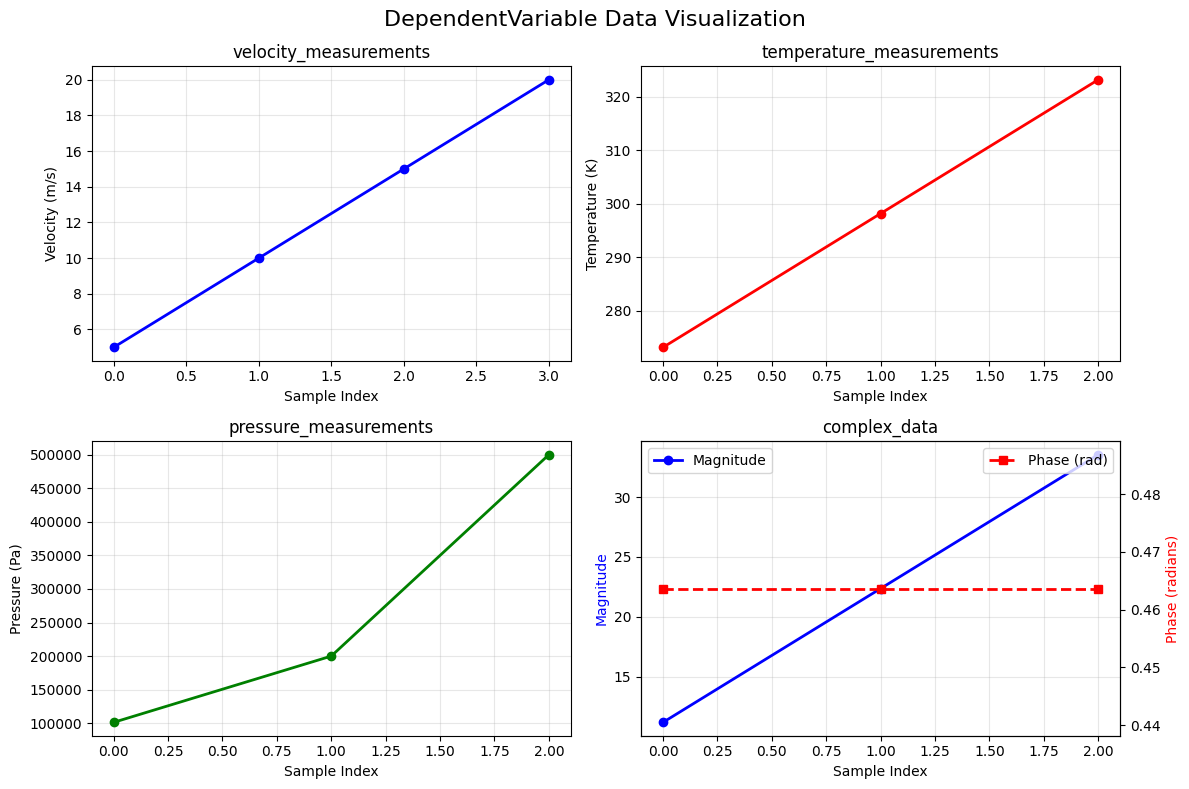

Created visualization of DependentVariable data with proper units and labels


In [9]:
# Create a figure with subplots for different measurements
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('DependentVariable Data Visualization', fontsize=16)

# Plot velocity data
axes[0, 0].plot(dv_velocity.components[0], 'bo-', linewidth=2, markersize=6)
axes[0, 0].set_title(f'{dv_velocity.name}')
axes[0, 0].set_ylabel(f'Velocity ({dv_velocity.unit.symbol})')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].grid(True, alpha=0.3)

# Plot temperature data
axes[0, 1].plot(dv_temperature.components[0], 'ro-', linewidth=2, markersize=6)
axes[0, 1].set_title(f'{dv_temperature.name}')
axes[0, 1].set_ylabel(f'Temperature ({dv_temperature.unit.symbol})')
axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].grid(True, alpha=0.3)

# Plot pressure data
axes[1, 0].plot(dv_pressure.components[0], 'go-', linewidth=2, markersize=6)
axes[1, 0].set_title(f'{dv_pressure.name}')
axes[1, 0].set_ylabel(f'Pressure ({dv_pressure.unit.symbol})')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].grid(True, alpha=0.3)

# Plot complex data (magnitude and phase)
complex_data = np.array(dv_complex.components[0])
magnitude = np.abs(complex_data)
phase = np.angle(complex_data)

axes[1, 1].plot(magnitude, 'b-', label='Magnitude', linewidth=2, marker='o')
ax2 = axes[1, 1].twinx()
ax2.plot(phase, 'r--', label='Phase (rad)', linewidth=2, marker='s')
axes[1, 1].set_title(f'{dv_complex.name}')
axes[1, 1].set_ylabel('Magnitude', color='b')
ax2.set_ylabel('Phase (radians)', color='r')
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Created visualization of DependentVariable data with proper units and labels")

## Error Handling and Validation

Let's test various error conditions and how DependentVariable handles them:

In [10]:
# Create a test DependentVariable for error testing
test_data = np.array([1.0, 2.0, 3.0], dtype=np.float64)
dv_test = DependentVariable(
    components=[test_data],
    name="error_test",
    description="Testing error conditions",
    unit=" ",
    quantity_name=q.Dimensionless,
    quantity_type="scalar",
    element_type="float64"
)

print("=== Testing Error Conditions ===")

# Test 1: Appending invalid types
print("\n1. Testing append with invalid types:")
try:
    dv_test.append("not a dependent variable")
    print("ERROR: Should have raised TypeError!")
except TypeError as e:
    print(f"✓ Correctly caught TypeError: {e}")

try:
    dv_test.append([1, 2, 3])
    print("ERROR: Should have raised TypeError!")
except TypeError as e:
    print(f"✓ Correctly caught TypeError: {e}")

# Test 2: Invalid size values
print("\n2. Testing invalid size values:")
try:
    dv_test.size = -5
    print("ERROR: Should have raised ValueError!")
except ValueError as e:
    print(f"✓ Correctly caught ValueError for negative size: {e}")

# Test 3: Operations on uninitialized DependentVariable
print("\n3. Testing operations on uninitialized DependentVariable:")
try:
    uninitialized_dv = DependentVariable.__new__(DependentVariable)
    uninitialized_dv.append(dv_test)
    print("ERROR: Should have raised ValueError!")
except ValueError as e:
    print(f"✓ Correctly caught ValueError: {e}")

try:
    other_uninitialized = DependentVariable.__new__(DependentVariable)
    dv_test.append(other_uninitialized)
    print("ERROR: Should have raised ValueError!")
except ValueError as e:
    print(f"✓ Correctly caught ValueError: {e}")

print("\n✅ All error handling tests passed!")

DEBUG: Created OCData with TypeID: 7, Type name: OCData
=== Testing Error Conditions ===

1. Testing append with invalid types:
✓ Correctly caught TypeError: other must be a DependentVariable
✓ Correctly caught TypeError: other must be a DependentVariable

2. Testing invalid size values:
✓ Correctly caught ValueError for negative size: Size must be non-negative

3. Testing operations on uninitialized DependentVariable:
✓ Correctly caught ValueError: DependentVariable not initialized
✓ Correctly caught ValueError: other DependentVariable not initialized

✅ All error handling tests passed!


## Advanced Features

Let's explore different import styles and advanced usage patterns:

In [11]:
# Test different import styles
print("=== Testing Different Import Styles ===")

# 1. Explicit imports
print("\n1. Explicit imports:")
try:
    from rmnpy.dependent_variable import DependentVariable as ExplicitDV
    from rmnpy.sitypes.unit import Unit as ExplicitUnit
    
    unit = ExplicitUnit("kg")
    data = np.array([1.0, 2.0], dtype=np.float64)
    dv_explicit = ExplicitDV(
        components=[data],
        name="mass_data",
        description="Mass measurements",
        unit=unit,
        quantity_name="mass",
        quantity_type="scalar",
        element_type="float64"
    )
    print(f"✓ Explicit import successful: {dv_explicit.name} with unit {dv_explicit.unit.symbol}")
except ImportError as e:
    print(f"✗ Explicit import failed: {e}")

# 2. Convenience imports
print("\n2. Convenience imports:")
try:
    from rmnpy.rmnlib import DependentVariable as ConvenienceDV
    from rmnpy.sitypes import Unit as ConvenienceUnit
    
    unit = ConvenienceUnit("K")
    data = np.array([273.15, 298.15], dtype=np.float64)
    dv_convenience = ConvenienceDV(
        components=[data],
        name="temperature_data",
        description="Temperature measurements",
        unit=unit,
        quantity_name="temperature",
        quantity_type="scalar",
        element_type="float64"
    )
    print(f"✓ Convenience import successful: {dv_convenience.name} with unit {dv_convenience.unit.symbol}")
except ImportError as e:
    print(f"✗ Convenience import failed: {e}")

# 3. Namespace alias imports
print("\n3. Namespace alias imports:")
import rmnpy as rmn

unit = rmn.sitypes.Unit("Pa")
data = np.array([101325.0, 200000.0], dtype=np.float64)
dv_alias = rmn.DependentVariable(
    components=[data],
    name="pressure_data",
    description="Pressure measurements",
    unit=unit,
    quantity_name="pressure",
    quantity_type="scalar",
    element_type="float64"
)
print(f"✓ Namespace alias successful: {dv_alias.name} with unit {dv_alias.unit.symbol}")

# Test accessing quantities through namespace
print(f"✓ Quantity access: {rmn.sitypes.quantity.Dimensionless}")

print("\n✅ All import styles work correctly!")

=== Testing Different Import Styles ===

1. Explicit imports:
✗ Explicit import failed: No module named 'rmnpy.dependent_variable'

2. Convenience imports:
DEBUG: Created OCData with TypeID: 7, Type name: OCData
✓ Convenience import successful: temperature_data with unit K

3. Namespace alias imports:
DEBUG: Created OCData with TypeID: 7, Type name: OCData
✓ Namespace alias successful: pressure_data with unit Pa
✓ Quantity access: dimensionless

✅ All import styles work correctly!


## Summary

This tutorial has demonstrated the key features of RMNpy's `DependentVariable` class:

### Key Features Covered:
1. **Basic Creation**: Creating DependentVariable instances with data, names, descriptions, and units
2. **Property Management**: Getting and setting properties like name, description, size, and quantity
3. **Data Types**: Working with scalar and multi-component data
4. **Operations**: Appending data and manipulating components
5. **Units Integration**: Using SITypes units and physical quantities
6. **Error Handling**: Proper validation and error reporting
7. **Import Flexibility**: Multiple ways to import and use the classes

### Best Practices:
- Always specify proper units and quantity names for scientific data
- Use descriptive names and descriptions for documentation
- Handle errors gracefully when working with user input
- Leverage the multi-component capability for complex data types
- Take advantage of different import styles for code organization

The `DependentVariable` class provides a robust foundation for handling scientific data with proper units, making it ideal for spectroscopy, NMR, and other scientific applications.